In [1]:
# Numerical libs
import numpy as np
import pandas as pd

# ML libs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#For toy dataset
from sklearn.datasets import load_iris, fetch_california_housing
from sklearn.datasets import make_blobs, make_circles, make_classification, make_moons
# Plotting libs
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from matplotlib.colors import ListedColormap,LinearSegmentedColormap
# Utils
import os

## Utils

In [33]:
# Util for plotting the boundary
def plot_boundary(X, model, cmap_name = 'seismic'):
    y_pred = model.predict(X)
    h = 0.05
    #https://stats.stackexchange.com/questions/71335/decision-boundary-plot-for-a-perceptron
    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    fig, ax = plt.subplots(figsize = (7, 7))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cmap_name, alpha = .25)
    #ax.contourf(xx, yy, Z, colors = ['blue, red'])
    #ax.axis('off')

    # Plot also the training points
    ax.scatter(*X.T, c=y_pred, cmap = cmap_name)
    ax.set_title('knn')
    plt.show()

In [33]:
cmap_seismic = cm.get_cmap('seismic', 512)
cmap_seismic = ListedColormap(cmap_seismic(np.linspace(0.45, 0.55, 5)))
cmap_viridis = cm.get_cmap('viridis', 512)
cmap_viridis = ListedColormap(cmap_viridis(np.linspace(0.45, 0.55, 255)))

# Load data

## Iris

In [26]:
data = load_iris(as_frame=True)
X, y = data['data'], data['target']
df_iris = pd.concat([X, y], axis = 1)
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [27]:
df_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


<Figure size 1080x1080 with 0 Axes>

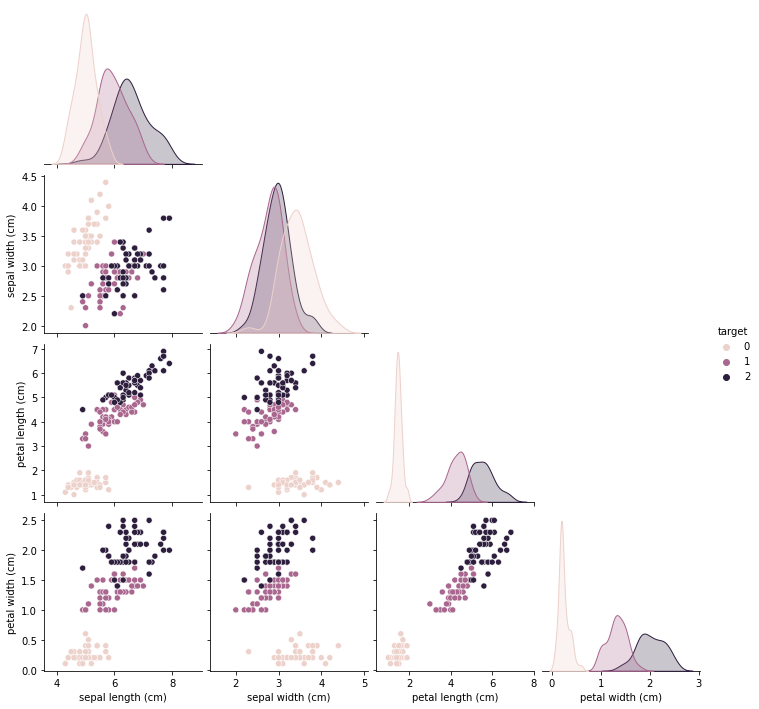

In [28]:
plt.figure(figsize=(15, 15))
sns.pairplot(df_iris, hue = 'target', corner = True)
plt.show()

## Cali house pricing

In [86]:
data = fetch_california_housing(data_home=os.path.join('..', 'data'), as_frame=True)

X, y = data['data'], data['target']
df_cali = pd.concat([X, y], axis = 1)
df_cali.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [88]:
print(y.name)

MedHouseVal


# Unsupervised

## Dimensionality reduction

### PCA

- [Making sense of pca](https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues)

In [36]:
from sklearn.decomposition import PCA

In [39]:
X, y = df_iris.drop('target', axis = 1), df_iris['target']

In [41]:
model = PCA(n_components=2)
model.fit(X)
emb = model.transform(X)

In [43]:
emb.shape

(150, 2)

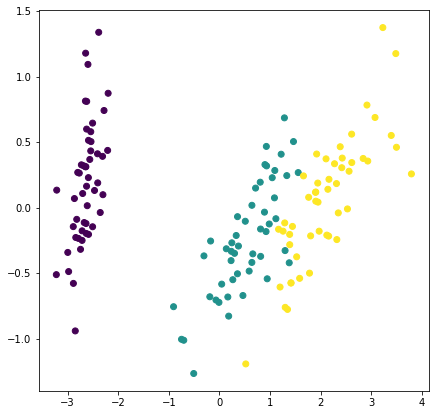

In [45]:
plt.figure(figsize = (7, 7))
plt.scatter(*emb.T, c = y)
plt.show()

### TSNE

In [47]:
from sklearn.manifold import TSNE

In [49]:
model = TSNE(n_components=2)
emb = model.fit_transform(X)

g:\conda3\envs\pytorch_env\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
g:\conda3\envs\pytorch_env\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [50]:
emb.shape

(150, 2)

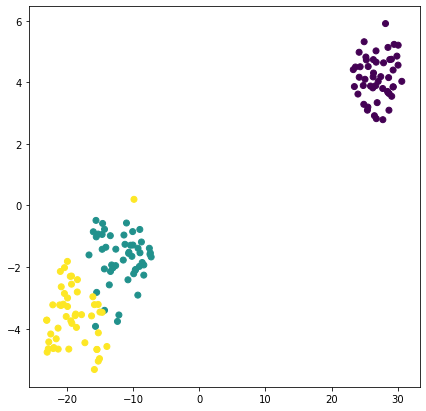

In [51]:
plt.figure(figsize = (7, 7))
plt.scatter(*emb.T, c = y)
plt.show()

In [52]:
from sklearn.cluster import KMeans

# Clustering

> Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters)

- A type of unsupervised learning (data dosen't have labels)
- Take a group of samples and try to group them into similar groups based on some metric

**Types of clustering**
- Centroid based clustering
- Hierarchichal clustering
- Distribution based clustering
- Density based clustering
- etc

## Centroid based clustering - Kmeans 

- [Explanation](https://www.youtube.com/watch?v=3vHqmPF4VBA)
- [Statquest explanation](https://www.youtube.com/watch?v=4b5d3muPQmA)
- [scikit-learn](https://scikit-learn.org/stable/modules/clustering.html)
- [animation](https://www.youtube.com/watch?v=BVFG7fd1H30)

> In centroid-based clustering, clusters are represented by a central vector (point)

**Note**
- The centroid may not necessarily be a member of the data set.

**Kmeans**

> The KMeans algorithm clusters data by trying to separate samples in $n$ groups of *equal variance*, minimizing a criterion known as the inertia or *within-cluster sum-of-squares*

**Inertia**
$$\sum^n_{i=0}\underset {\mu_j \in C}{min}(\|x_i - \mu_j\|^2) $$
where
- $x_i \in X$ are the samples
- $C$ are the disjoint clusters with mean $\mu_j$

**Pros**
- Fast - linear complexity
**Cons**
- Assumes clusters are convex and circular (manifolds, irregular shapes break this assumption)
- Distances in higher dimension suck (curse of dimensionality)

In [9]:
from sklearn.cluster import KMeans

In [10]:
# Make datasets
X1, y1 = make_blobs(n_samples = 1000, centers = 3, n_features = 2, random_state = 42)
X2, y2 = make_moons(n_samples = 1000, noise = .1 ,  random_state = 42)
X3, y3 = make_classification(n_samples = 1000, n_features = 2, n_informative = 2, n_redundant = 0, random_state = 42)
X4, y4 = make_circles(n_samples = 1000, noise = .01, random_state = 42)

kmeans = KMeans(n_clusters = 2)
kmeans.fit(X1)
y1_pred = kmeans.predict(X1)
centers1 = kmeans.cluster_centers_

kmeans = KMeans(n_clusters = 2)
kmeans.fit(X2)
y2_pred = kmeans.predict(X2)
centers2 = kmeans.cluster_centers_

kmeans = KMeans(n_clusters = 2)
kmeans.fit(X3)
y3_pred = kmeans.predict(X3)
centers3 = kmeans.cluster_centers_

kmeans = KMeans(n_clusters = 2)
kmeans.fit(X4)
y4_pred = kmeans.predict(X4)
centers4 = kmeans.cluster_centers_

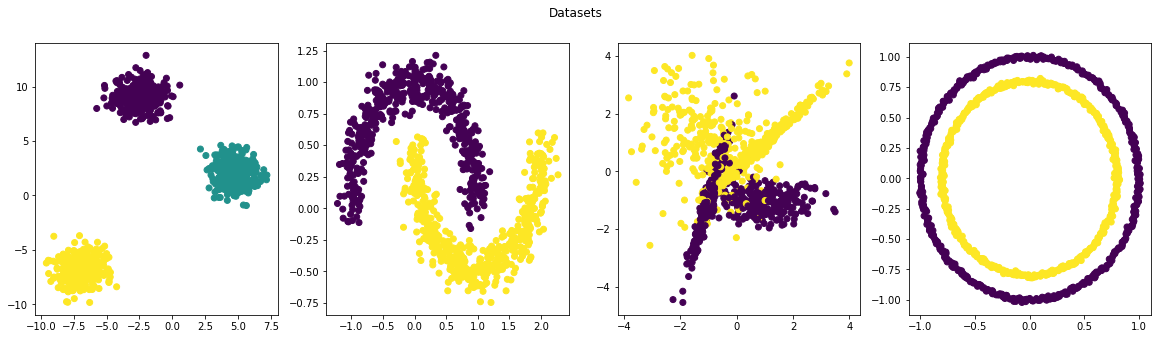

In [11]:
fig = plt.figure(figsize = (20, 5))
fig.suptitle("Datasets")
for i, (X, y) in enumerate(zip([X1, X2, X3, X4], [y1, y2, y3, y4])):
    plt.subplot(1, 4, i+1)
    plt.scatter(*X.T, c = y)

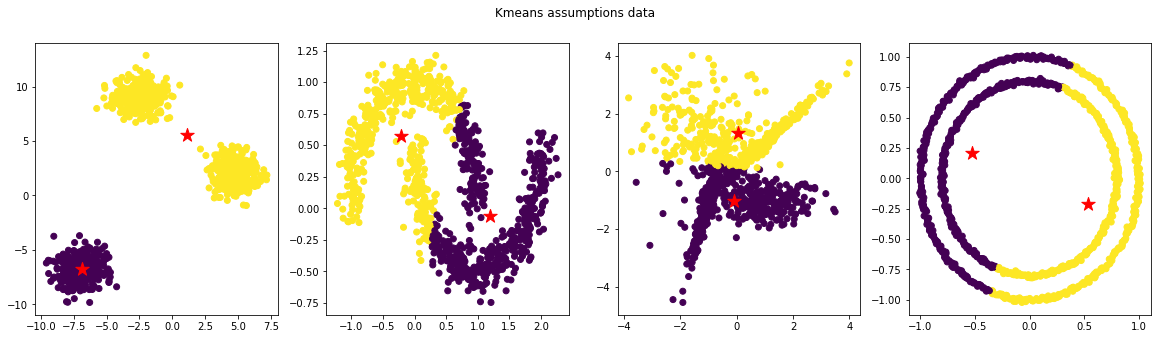

In [74]:
fig = plt.figure(figsize = (20, 5))
fig.suptitle("Kmeans assumptions data")
for i, (X, y, centers) in enumerate(zip([X1, X2, X3, X4], [y1_pred, y2_pred, y3_pred, y4_pred], [centers1, centers2, centers3, centers4])):
    plt.subplot(1, 4, i+1)
    plt.scatter(*X.T, c = y)
    plt.scatter(*centers.T, c = 'r', marker = '*', s = 200)


## Density based clustering - DBSCAN

- https://blog.dominodatalab.com/topology-and-density-based-clustering/
- https://www.youtube.com/watch?v=_A9Tq6mGtLI - explanation

> In density based clustering we want to form clusters based on the desnity of the points in a neighbourhood of distance $\epsilon$ between points.

In DBSCAN$(\epsilon, n)$ we have 
- *core sample* - a point that has in his $\epsilon$-neighbourhood $n$ samples
- *non-core sample* - point that is in a neighbourhood but doesn't have the minimum $n$ samples around him
- *outlier sample* - point that has distance $>\epsilon$ from any core sample

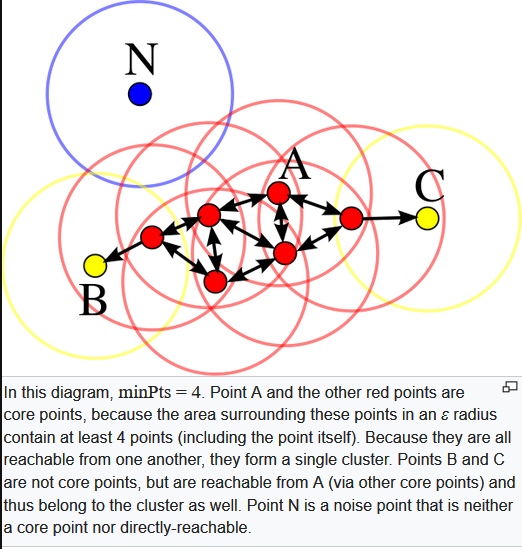
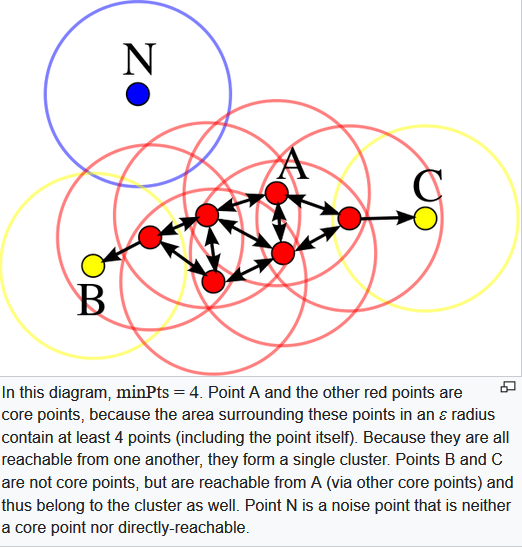

In [66]:
from sklearn.cluster import DBSCAN

In [67]:
X1, y1 = make_blobs(n_samples = 1000, centers = 3, n_features = 2, random_state = 42)
X2, y2 = make_moons(n_samples = 1000, noise = .1 ,  random_state = 42)
X3, y3 = make_classification(n_samples = 1000, n_features = 2, n_informative = 2, n_redundant = 0, random_state = 42)
X4, y4 = make_circles(n_samples = 1000, noise = .01, random_state = 42)

dbscan = DBSCAN(eps = .5, min_samples = 10)
dbscan.fit(X1)
y1_pred = dbscan.labels_


dbscan = DBSCAN(eps = .15, min_samples = 10) # Try with eps = .5
dbscan.fit(X2)
y2_pred = dbscan.labels_


dbscan = DBSCAN(eps = .25, min_samples = 10) # Try with eps = .5
dbscan.fit(X3)
y3_pred = dbscan.labels_


dbscan = DBSCAN(eps = .15, min_samples = 10) # Try with eps = .5
dbscan.fit(X4)
y4_pred = dbscan.labels_


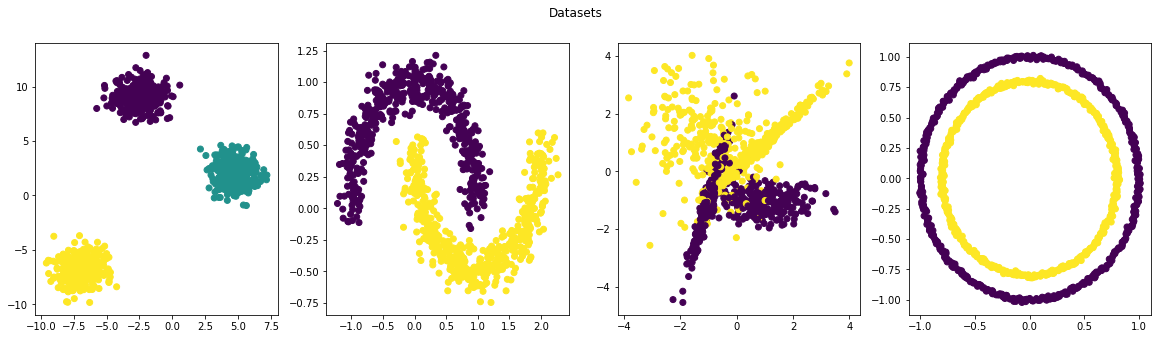

In [68]:
fig = plt.figure(figsize = (20, 5))
fig.suptitle("Datasets")
for i, (X, y) in enumerate(zip([X1, X2, X3, X4], [y1, y2, y3, y4])):
    plt.subplot(1, 4, i+1)
    plt.scatter(*X.T, c = y)

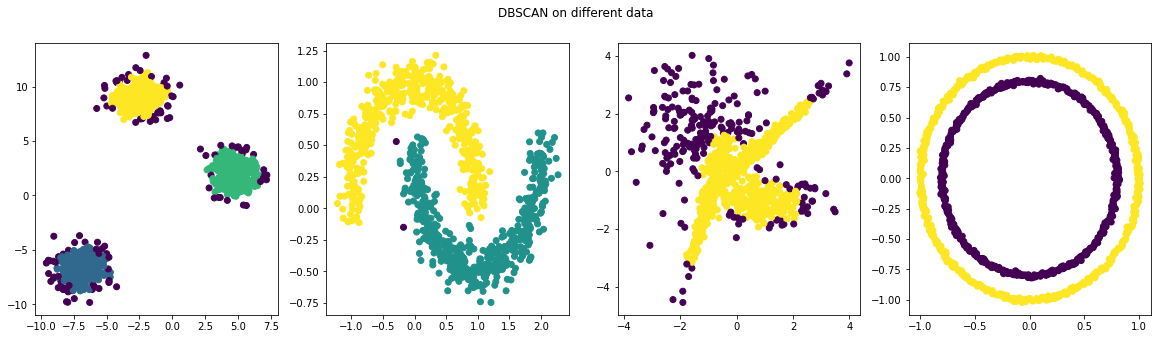

In [69]:
fig = plt.figure(figsize = (20, 5))
fig.suptitle("DBSCAN on different data")
for i, (X, y) in enumerate(zip([X1, X2, X3, X4], [y1_pred, y2_pred, y3_pred, y4_pred])):
    plt.subplot(1, 4, i+1)
    plt.scatter(*X.T, c = y)
    #plt.scatter(*centers.T, c = 'r', marker = '*', s = 200)


# Supervised

## Classification tasks

### KNN

**Assumption**: 
- Similar Inputs have similar outputs

**Classification rule**: 
- For a test input $x$, assign the most common label amongst its $k$ most similar training inputs 

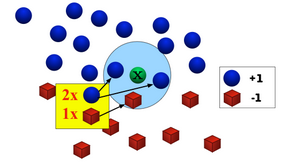

## Curse of Dimensionality

$k$NN assumes similar points share similar labels. In high dimensional space points that are drawn from a probability distribution, tend to never be close together.
- https://www.youtube.com/watch?v=4v7ngaiFdp4 - 5 min  explanation
- https://en.wikipedia.org/wiki/Curse_of_dimensionality
- https://www.youtube.com/watch?v=BbYV8UfMJSA&t - 15-20 min explanation

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
k = 5

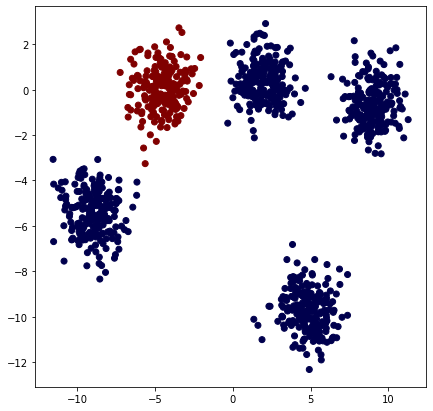

In [40]:
# Generate data
X, y = make_blobs(n_samples=1000, centers=5, n_features=2, random_state=170) #random state 0 or 5 for mixed, 1, 2, 170 for cool
y = np.array([1 if yi == 1 else -1 for yi in y])

# Code: Scatter plot to look at data
plt.figure(figsize = (7, 7))
plt.scatter(*X.T, c = y, cmap = 'seismic')

In [41]:
# Fit the data
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X, y)
y_pred = knn.predict(X)

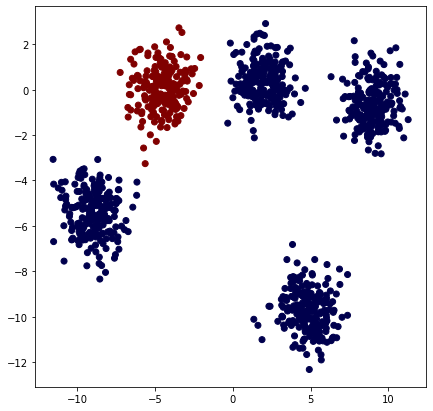

In [42]:
# Prediction scatter plot
plt.figure(figsize = (7, 7))
plt.scatter(X[:, 0], X[:, 1], c = y_pred, cmap = 'seismic')

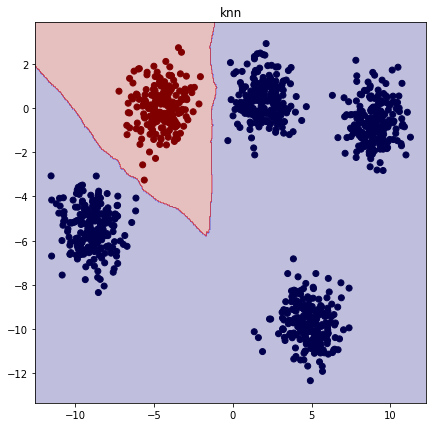

In [43]:
plot_boundary(X, knn,  cmap_name = 'seismic')

In [44]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_classes=4, n_clusters_per_class=1, n_redundant=0, n_repeated=0, random_state=3) # 3 is fine


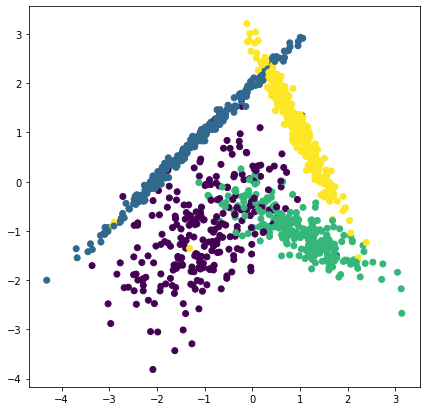

In [45]:
plt.figure(figsize = (7, 7))
plt.scatter(*X.T, c = y)
plt.show()

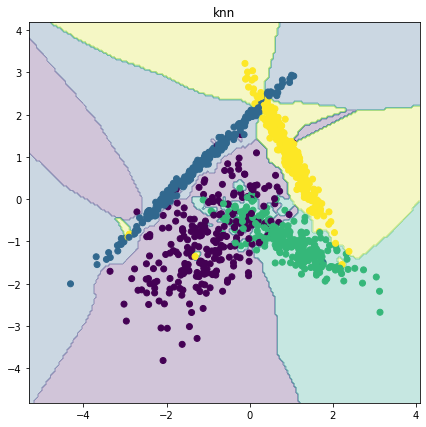

In [46]:
# Fit predict
k = 1 # Play with this
knn = KNeighborsClassifier(k)
knn.fit(X, y)
plot_boundary(X, knn, cmap_name='viridis')

### Perceptron

**Assumptions**
- Binary classification  $\to y_i \in \{−1,+1\}$
- Data is linearly separable

**Classifier**
$$h(x_i) = \begin{cases}
1 \iff w^Tx + b \geq 0 
\\ -1 \text{ otherwise}
\end{cases}$$

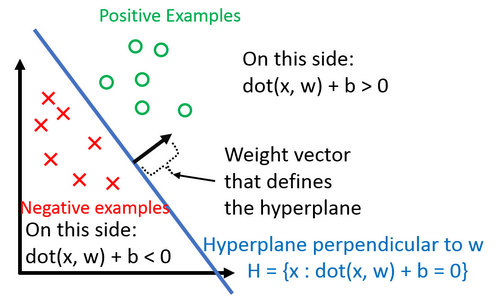



**Note**
- $ y_i(w^Tx_i + b) > 0 \iff x_i $ is classified correctly
- $y_i \in \{−1,+1\}$ for this condition to work

**Why the bias?**
- If we didn't have the bias our decision boundary would've always passed through the origin
- Therefore a dataset such as the one in the image above would be unclassifiable

*Intuition*
1. Using a bias we can move away from the origin

2. Geometric interpretation $\to$ Extend one dimension and make the equation go through the origin
$$ \begin{bmatrix}x_i \\ 1 \end{bmatrix}^T \begin{bmatrix} w \\ b \end{bmatrix} = w^Tx_i + b$$
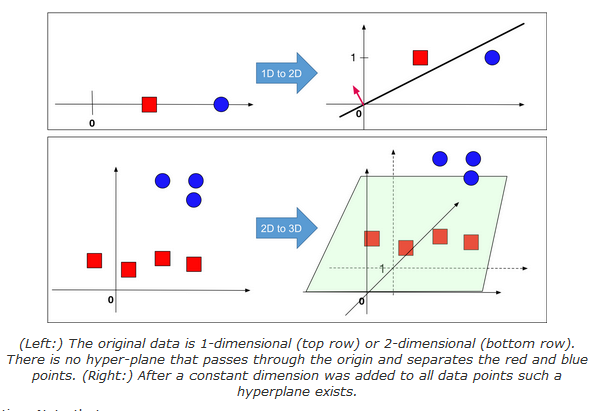

**Perceptron step**

If we missclassify a sample $i$ we must correct
- $w = w + \alpha \cdot y_i \cdot x_i$
- $b = b + \alpha \cdot y_i$
- where $\alpha$ is the learning rate

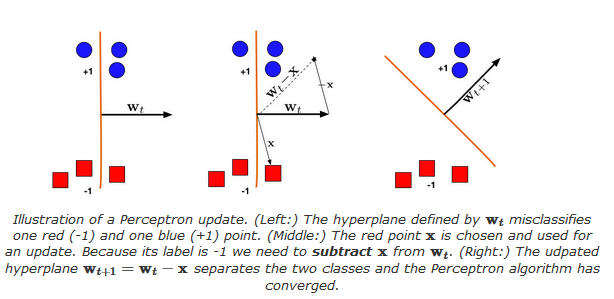

- https://youtu.be/wl7gVvI-HuY?list=PLl8OlHZGYOQ7bkVbuRthEsaLr7bONzbXS&t=1567 - This example for intuition

**Proof of convergence**
- [proof](http://www.cs.columbia.edu/~mcollins/courses/6998-2012/notes/perc.converge.pdf)
- [lecture notes](http://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/lecturenote03.html)
- [more notes](https://www.cse.iitb.ac.in/~shivaram/teaching/old/cs344+386-s2017/resources/classnote-1.pdf) -page 4

In [47]:
from sklearn.linear_model import Perceptron

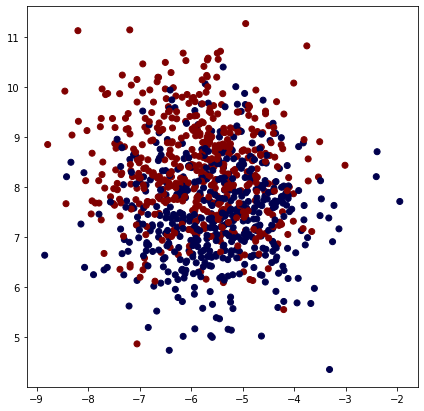

In [48]:
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=5) #random state 0 or 5 for mixed, 1, 2, 170 for cool
#y = np.array([1 if yi == 1 else -1 for yi in y])

# Code: Scatter plot to look at data
plt.figure(figsize = (7, 7))
plt.scatter(*X.T, c = y, cmap = 'seismic')

In [49]:
# Fit predict
model = Perceptron(early_stopping=True, fit_intercept=False)
model.fit(X, y)
preds = model.predict(X)

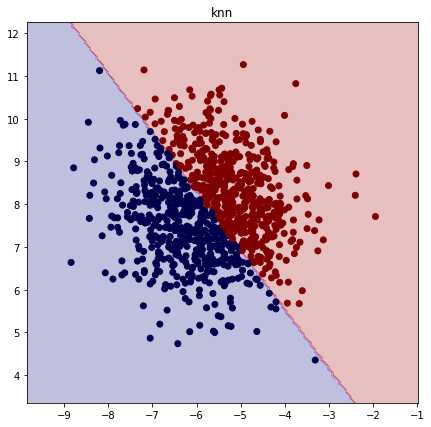

In [50]:
plot_boundary(X, model, cmap_name='seismic')

## Regression tasks

https://scikit-learn.org/stable/modules/linear_model.html

Suppose our datasets consists of points $(x,y)$ where 
- $x \in \mathbb{R}^d$ is a feature vector
- $y \in \mathbb{R}$ is the target value (no longer classification)

**Linear Regression**
> We assume that $y$ is a linear combination of our feature vector $x \Rightarrow y \approx h(x; w) = w_0 + w_1x_1 + ... + w_dx_d$

$h$ is parameterized by $w = (w_0, ..., w_d)$, the weights
- aka we want to find the best $w$ that predicts the best data

### Least square regression / Linear regression

- [Steve Brunton explanation](https://www.youtube.com/watch?v=EDPCsD6BzWE)
- [StatQuest explanation](https://www.youtube.com/watch?v=nk2CQITm_eo)

**The question arises**
- How do we make our line *fit* the data?

*One solution*
- What we want is to find $w$ s.t. $h(x; w)$ is close to $y$.

*How do we define close?*

> **Error:**
> We want to find $w$ s.t. we minimze $\|\underbrace{Xw}_{\text{prediction}} - y\|_2^2$

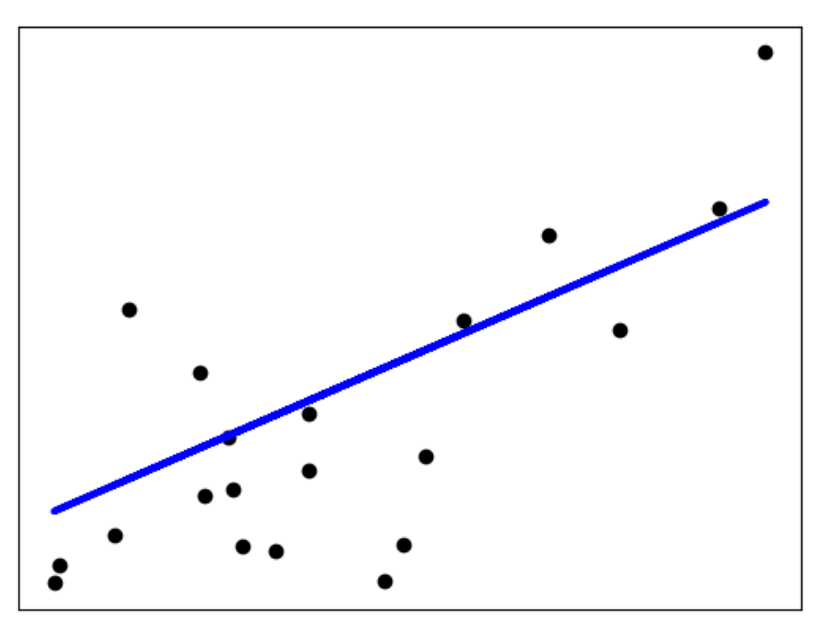


In [98]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

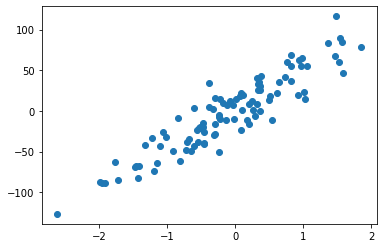

In [123]:
X, y = make_regression(n_samples=100, n_features=1, n_targets=1, noise = 20, random_state=42)
plt.scatter(X, y)
plt.show()

In [124]:
model = LinearRegression()
model.fit(X, y)
preds = model.predict(X)

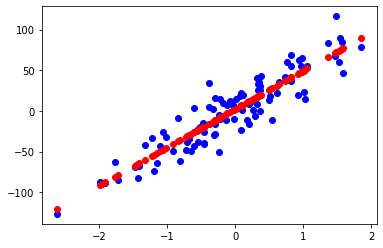

In [125]:
plt.scatter(X, y, c='b')
plt.scatter(X, preds, c = 'r')
plt.show()